# TRANSIENT UNIVERSE: MODEL COMPARISON
We consider again the data of the flux given times.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import dynesty
from dynesty import plotting
from dynesty import utils

In [2]:
file = open("../solutions/transient.npy", 'rb')
data = np.load(file)
times = data[:,0]
fluxes = data[:,1]
err_flux = data[:,2]

Text(0.5, 1.0, 'Flux vs time')

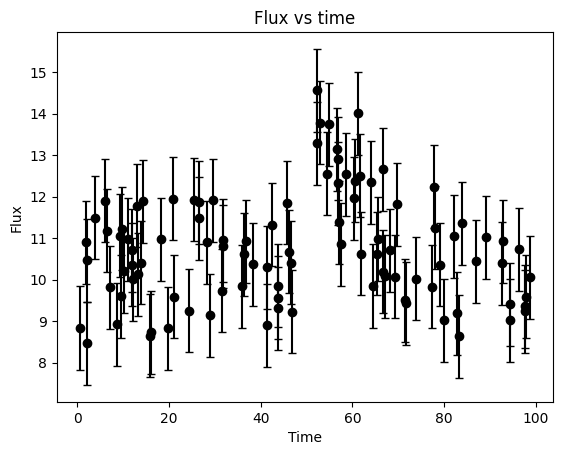

In [3]:
plt.errorbar(times, fluxes, xerr = None, yerr = err_flux, fmt = 'o', color = 'black', capsize = 3)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux vs time")

In this case we want to compare the burst model to another one: the gaussian model. It is described by:
$$b + A\,\exp (-(t-t_0)^2/2\sigma_W^2).$$
To compare the two models, we need to compute the evideces of the two models. We begin with the burst model. To guarantee a better convergence of the algorithm, we decided to provide different bounds to the parameters:
1) $b \in \mathrm{Unif}[5.0, 15.0]$;
2) $A \in \mathrm{Unif}[0.0, 10.0]$;
3) $t_0 \in \mathrm{Unif}[25.0, 75.0]$;
4) $\ln \alpha \in \mathrm{Unif}[-5, 2]$.

This also because in some regions of the parameter space the exponential in the model went in overflow with the old constraints.

In [4]:
def burst(x, data):
    return x[0] + (data > x[2]) * x[1] * np.exp(-x[3] * (data-x[2])) # x = [b, A, t0, alpha]

model = burst

def log_likelihood(x):
    return np.sum(-0.5 * ((fluxes - model(x, times)) / (err_flux))**2.0 - 0.5*np.log(2*np.pi*(err_flux**2.0)))

n_par = 4
x_lim = np.array([[5.0, 15.0], [0.0, 10.0], [25.0, 75.0], [-5.0, 2.0]])

def prior_transform(x):
    priors = np.zeros(n_par)
    priors[0] = x_lim[0][0] + (x_lim[0][1] - x_lim[0][0])*x[0]
    priors[1] = x_lim[1][0] + (x_lim[1][1] - x_lim[1][0])*x[1]
    priors[2] = x_lim[2][0] + (x_lim[2][1] - x_lim[2][0])*x[2]
    priors[3] = np.exp(x_lim[3][0] + (x_lim[3][1] - x_lim[3][0])*x[3])
    return priors

In [5]:
sampler_burst = dynesty.NestedSampler(log_likelihood, prior_transform, n_par)
sampler_burst.run_nested()
burst_result = sampler_burst.results

5587it [00:04, 1368.24it/s, +500 | bound: 35 | nc: 1 | ncall: 44711 | eff(%): 13.768 | loglstar:   -inf < -140.661 <    inf | logz: -151.042 +/-  0.140 | dlogz:  0.001 >  0.509]


We plot some of the diagnostic plots to see if the process went good.

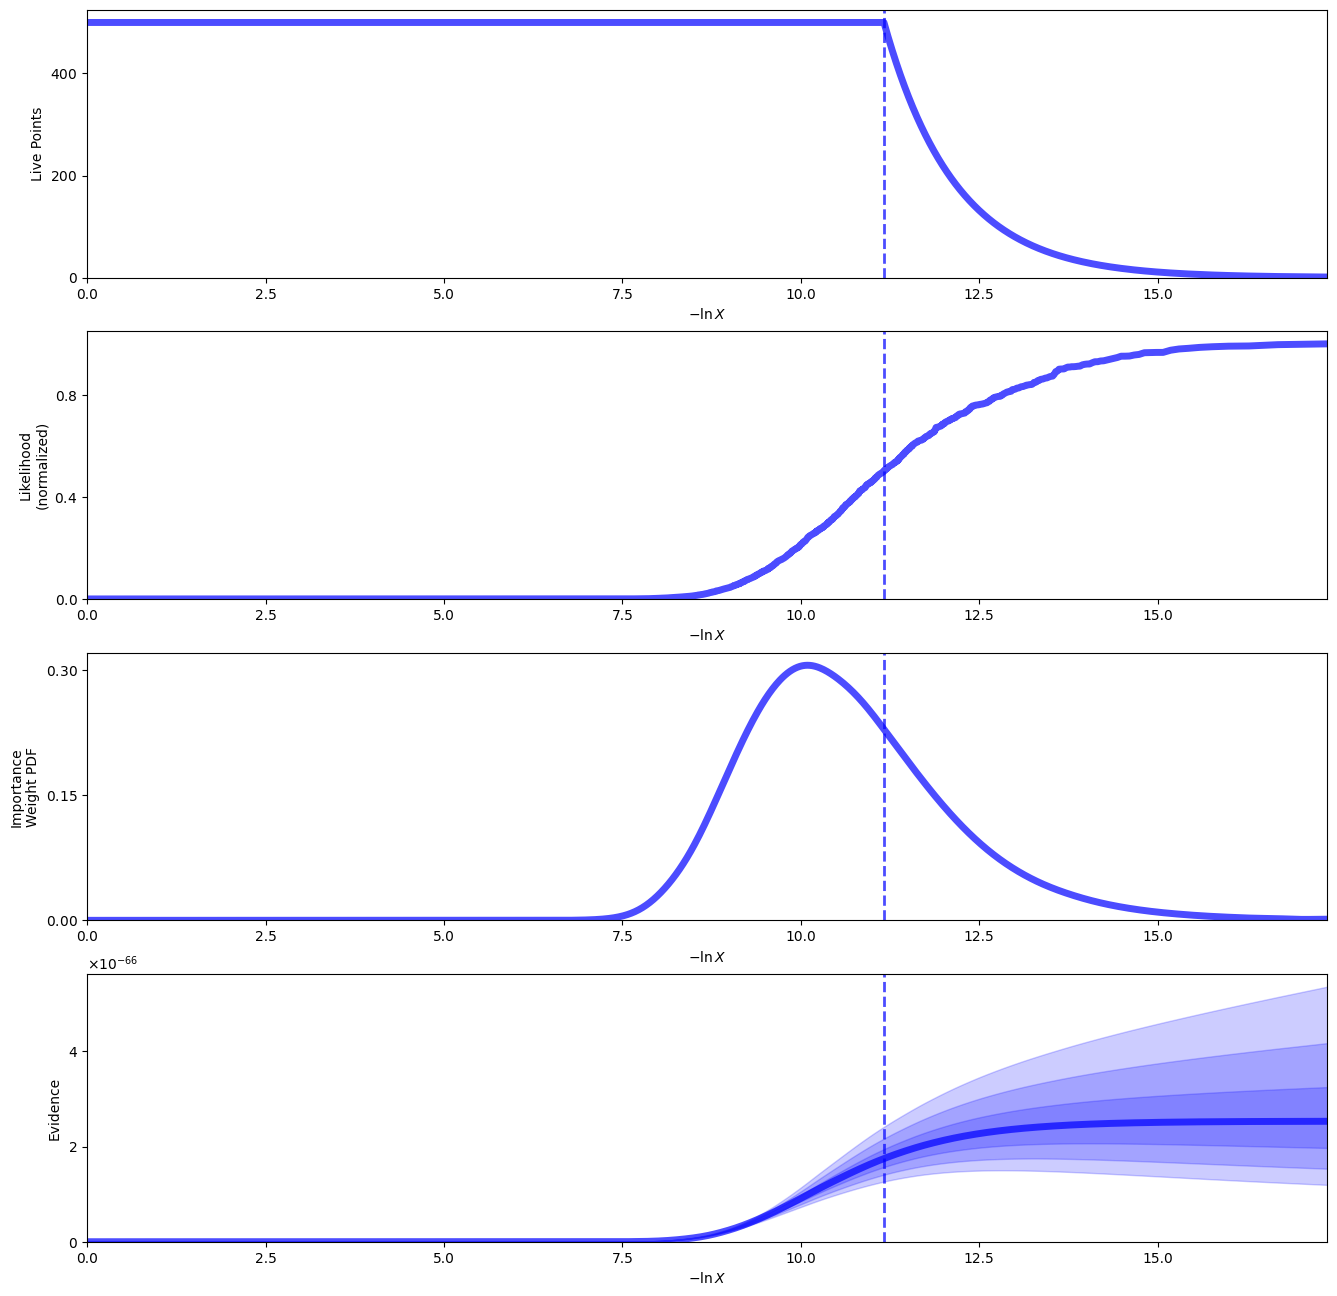

In [6]:
_ = dynesty.plotting.runplot(burst_result)

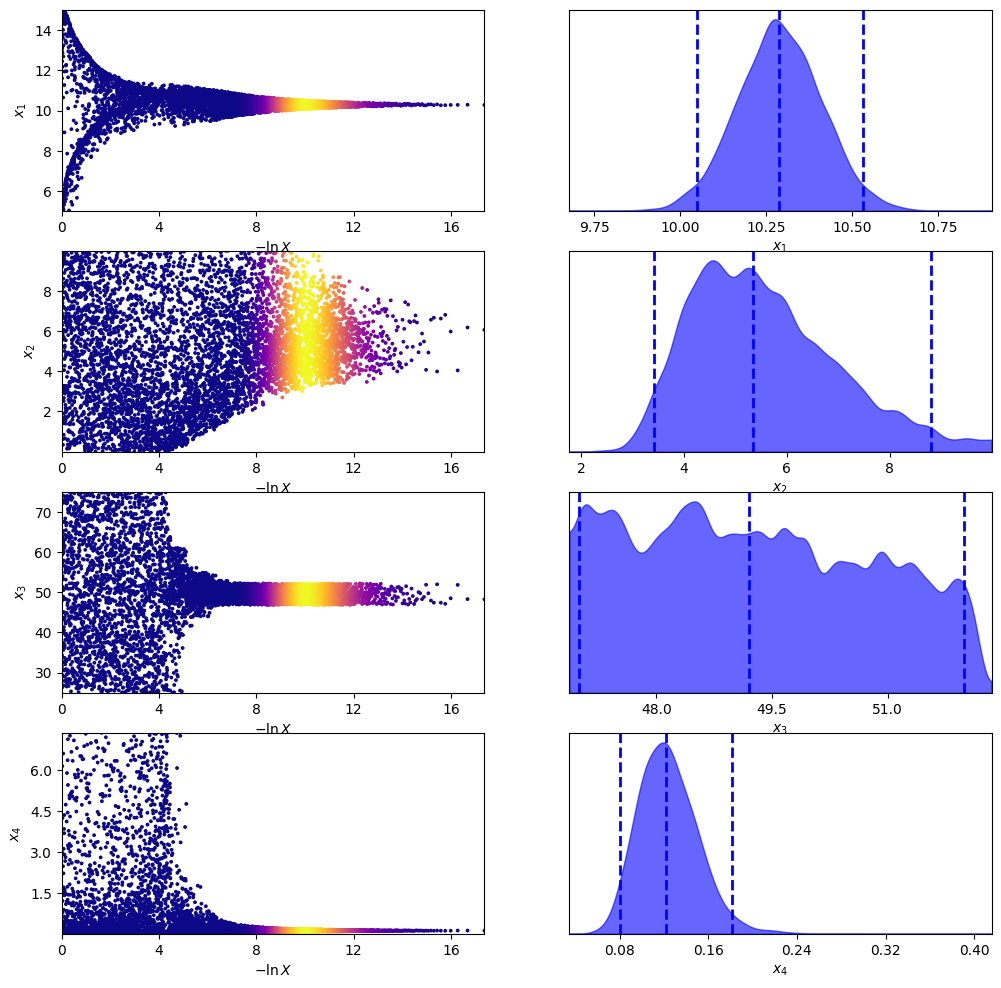

In [7]:
 _ = dynesty.plotting.traceplot(burst_result)

We also plot the corner plot to see the correspondece with the old one:

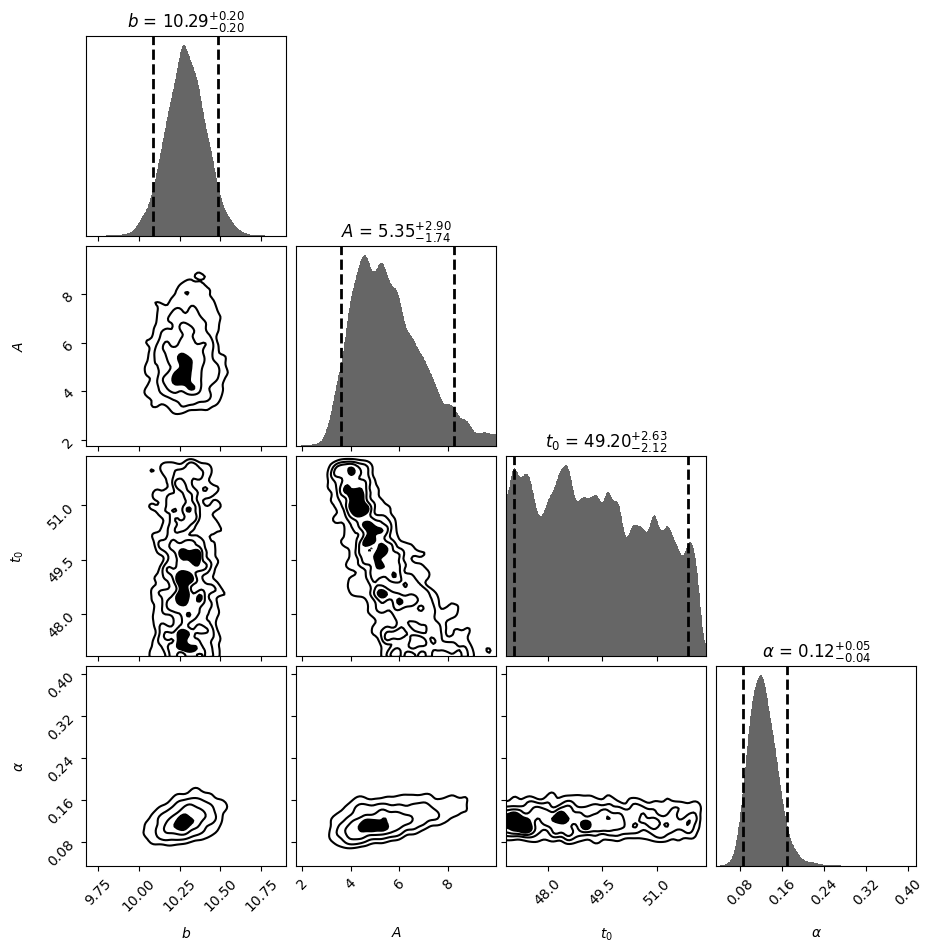

In [8]:
_ = dynesty.plotting.cornerplot(burst_result, quantiles = [0.05, 0.95], labels = [r"$b$", r"$A$", r"$t_0$", r"$\alpha$"], \
                            title_quantiles=(0.05, 0.5, 0.95), show_titles=True)

We see frome the titles that the results are compatible with what we obtained using MCMC.
Now we do the same thing for the gaussian model. We decided this priors:
1) $b \in \mathrm{Unif}[5.0, 15.0]$;
2) $A \in \mathrm{Unif}[0.0, 10.0]$;
3) $t_0 \in \mathrm{Unif}[25.0, 75.0]$;
4) $\ln \sigma_W \in \mathrm{Unif}[-5, 3]$.

In [9]:
def gauss(x, data):
    return x[0] + x[1] * np.exp(-0.5*((data - x[2])/x[3])**2.0) # x = [b, A, t0, sigma]

model = gauss

def log_likelihood(x):
    return np.sum(-0.5 * ((fluxes - model(x, times)) / (err_flux))**2.0 - 0.5*np.log(2*np.pi*(err_flux**2.0)))

n_par = 4
x_lim = np.array([[5.0, 15.0], [0.0, 10.0], [25.0, 75.0], [-5.0, 3.0]])

def prior_transform(x):
    priors = np.zeros(n_par)
    priors[0] = x_lim[0][0] + (x_lim[0][1] - x_lim[0][0])*x[0]
    priors[1] = x_lim[1][0] + (x_lim[1][1] - x_lim[1][0])*x[1]
    priors[2] = x_lim[2][0] + (x_lim[2][1] - x_lim[2][0])*x[2]
    priors[3] = np.exp(x_lim[3][0] + (x_lim[3][1] - x_lim[3][0])*x[3])
    return priors

In [10]:
sampler_gauss = dynesty.NestedSampler(log_likelihood, prior_transform, n_par)
sampler_gauss.run_nested()
gauss_result = sampler_gauss.results

6322it [00:04, 1306.18it/s, +500 | bound: 39 | nc: 1 | ncall: 46883 | eff(%): 14.708 | loglstar:   -inf < -144.425 <    inf | logz: -156.324 +/-  0.154 | dlogz:  0.001 >  0.509]


Diagnistic plots:

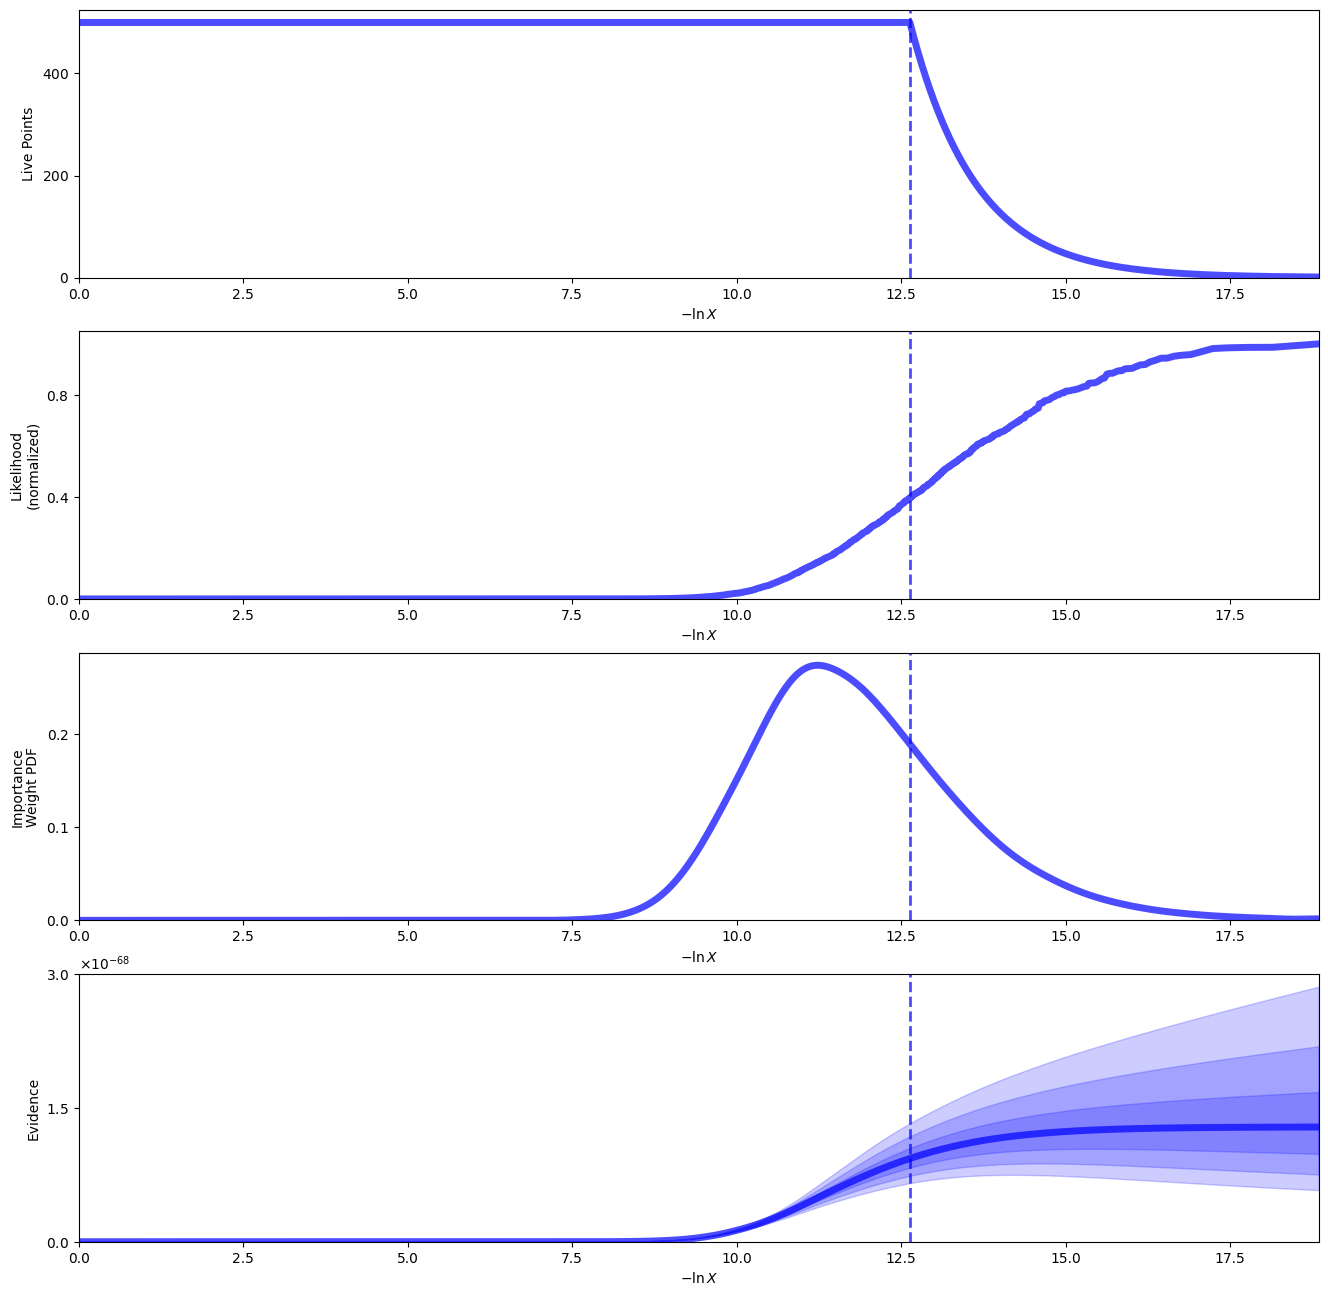

In [11]:
_ = dynesty.plotting.runplot(gauss_result)

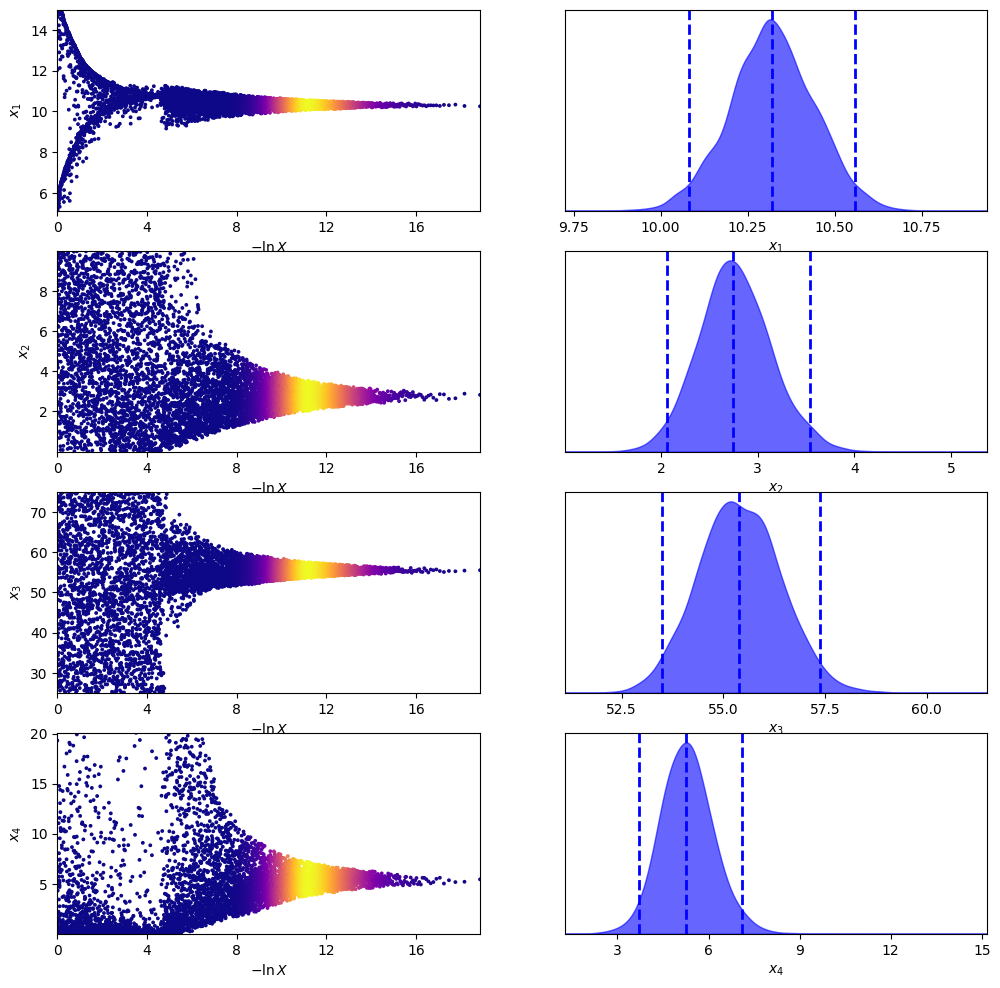

In [12]:
_ = dynesty.plotting.traceplot(gauss_result)

And now we make the corner plot, where we can read the medians and the 90% credible regions

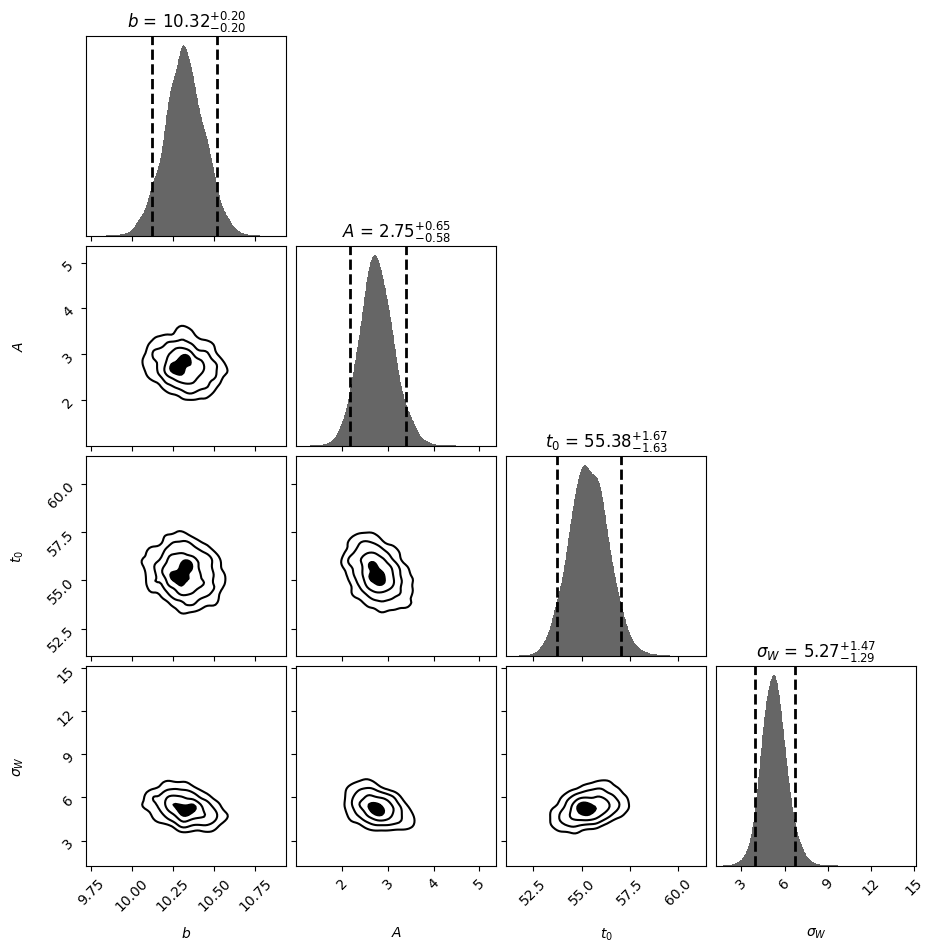

In [13]:
_ = dynesty.plotting.cornerplot(gauss_result, quantiles = [0.05, 0.95], labels = [r"$b$", r"$A$", r"$t_0$", r"$\sigma_W$"], \
                            title_quantiles=(0.05, 0.5, 0.95), show_titles=True)

For this model, as we did with the burst one, we can plot some of the models over the data:

Text(0.5, 1.0, 'Gaussian model with different possible parameters')

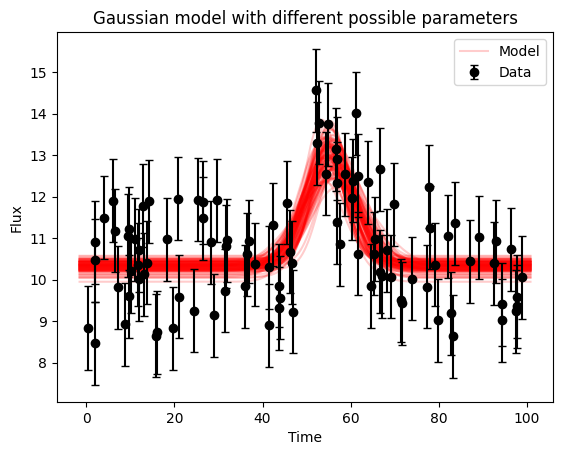

In [14]:
g_sample = gauss_result.samples
g_weight = np.exp(gauss_result.logwt - gauss_result.logz[-1])

g_sample_eq = dynesty.utils.resample_equal(g_sample, g_weight)
xgrid = np.linspace(np.min(times)-2.0, np.max(times)+2.0, 1000)
rng = np.random.default_rng()
random_par = rng.choice(g_sample_eq, 100, replace=False, axis = 0)

for i in range(100):
    if i == 0:
        plt.plot(xgrid, gauss(random_par[i], xgrid), color='red', alpha = 0.2, label = "Model")
    else:
        plt.plot(xgrid, gauss(random_par[i], xgrid), color='red', alpha = 0.2)
plt.errorbar(times, fluxes, xerr = None, yerr = err_flux, fmt = 'o', color = 'black', capsize = 3, label = "Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Gaussian model with different possible parameters")

Finally, we can read the evidences and compute the Bayes' factor:

In [15]:
print("Log of the evidence of the burst model: {} +- {}".format(burst_result.logz[-1], burst_result.logzerr[-1]))
print("Log of the evidence of the gaussian model: {} +- {}".format(gauss_result.logz[-1], gauss_result.logzerr[-1]))
err_b = np.sqrt(burst_result.logzerr[-1] ** 2.0 + gauss_result.logzerr[-1] ** 2.0)
print("Bayes Factor: {} +- {}".format(burst_result.logz[-1] - gauss_result.logz[-1], err_b))

Log of the evidence of the burst model: -151.04220601935327 +- 0.2501710259184661
Log of the evidence of the gaussian model: -156.3241513386113 +- 0.2664429014799067
Bayes Factor: 5.281945319258028 +- 0.3654823688745178


We can claim that there is a decisive evidence (within the errors) that the burst model describe better the flux measured.